In [ ]:
!pip install diffusers
!pip install accelerate

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/sample\ data

/content/drive/MyDrive/sample data


In [4]:
pwd

'/content/drive/MyDrive/sample data'

In [6]:
import numpy as np
import imageio

def frames_to_video(frames, path, fps=20):
    """
    Converts a 5D array of video frames to an MP4 video and saves it.

    Parameters:
    - frames: A 5D numpy array of shape (1, num_frames, height, width, channels).
    - output_path: Path where the MP4 video will be saved.
    - fps: Frames per second for the output video.
    """
    # Validate input dimensions
    if frames.ndim != 5 or frames.shape[-1] != 3:
        raise ValueError("Expected frames to be a 5D array of shape (1, num_frames, height, width, 3)")

    # Extract the batch of frames (assuming the first dimension size is 1)
    frames_batch = frames[0]

    # Create a writer object
    writer = imageio.get_writer(path, fps=fps)

    # Iterate over each frame and add it to the video
    for frame in frames_batch:
        writer.append_data(frame)
    writer.close()

    print(f"Video saved to {path}")

In [8]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

def generate_video_from_text(prompt, model_id="damo-vilab/text-to-video-ms-1.7b", num_inference_steps=200):
    # Load the diffusion pipeline with the specified model
    pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, variant="fp16")
    # Configure the scheduler
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    # Enable CPU offloading to save GPU memory
    pipe.enable_model_cpu_offload()

    # Generate video frames from the text prompt
    video_frames = pipe(prompt, num_inference_steps=num_inference_steps).frames

    return video_frames


In [ ]:
prompt = "Superman eating hotdog"
output_path = 'video5.mp4'

vid_frames = generate_video_from_text(prompt)
frames_to_video(vid_frames, output_path)

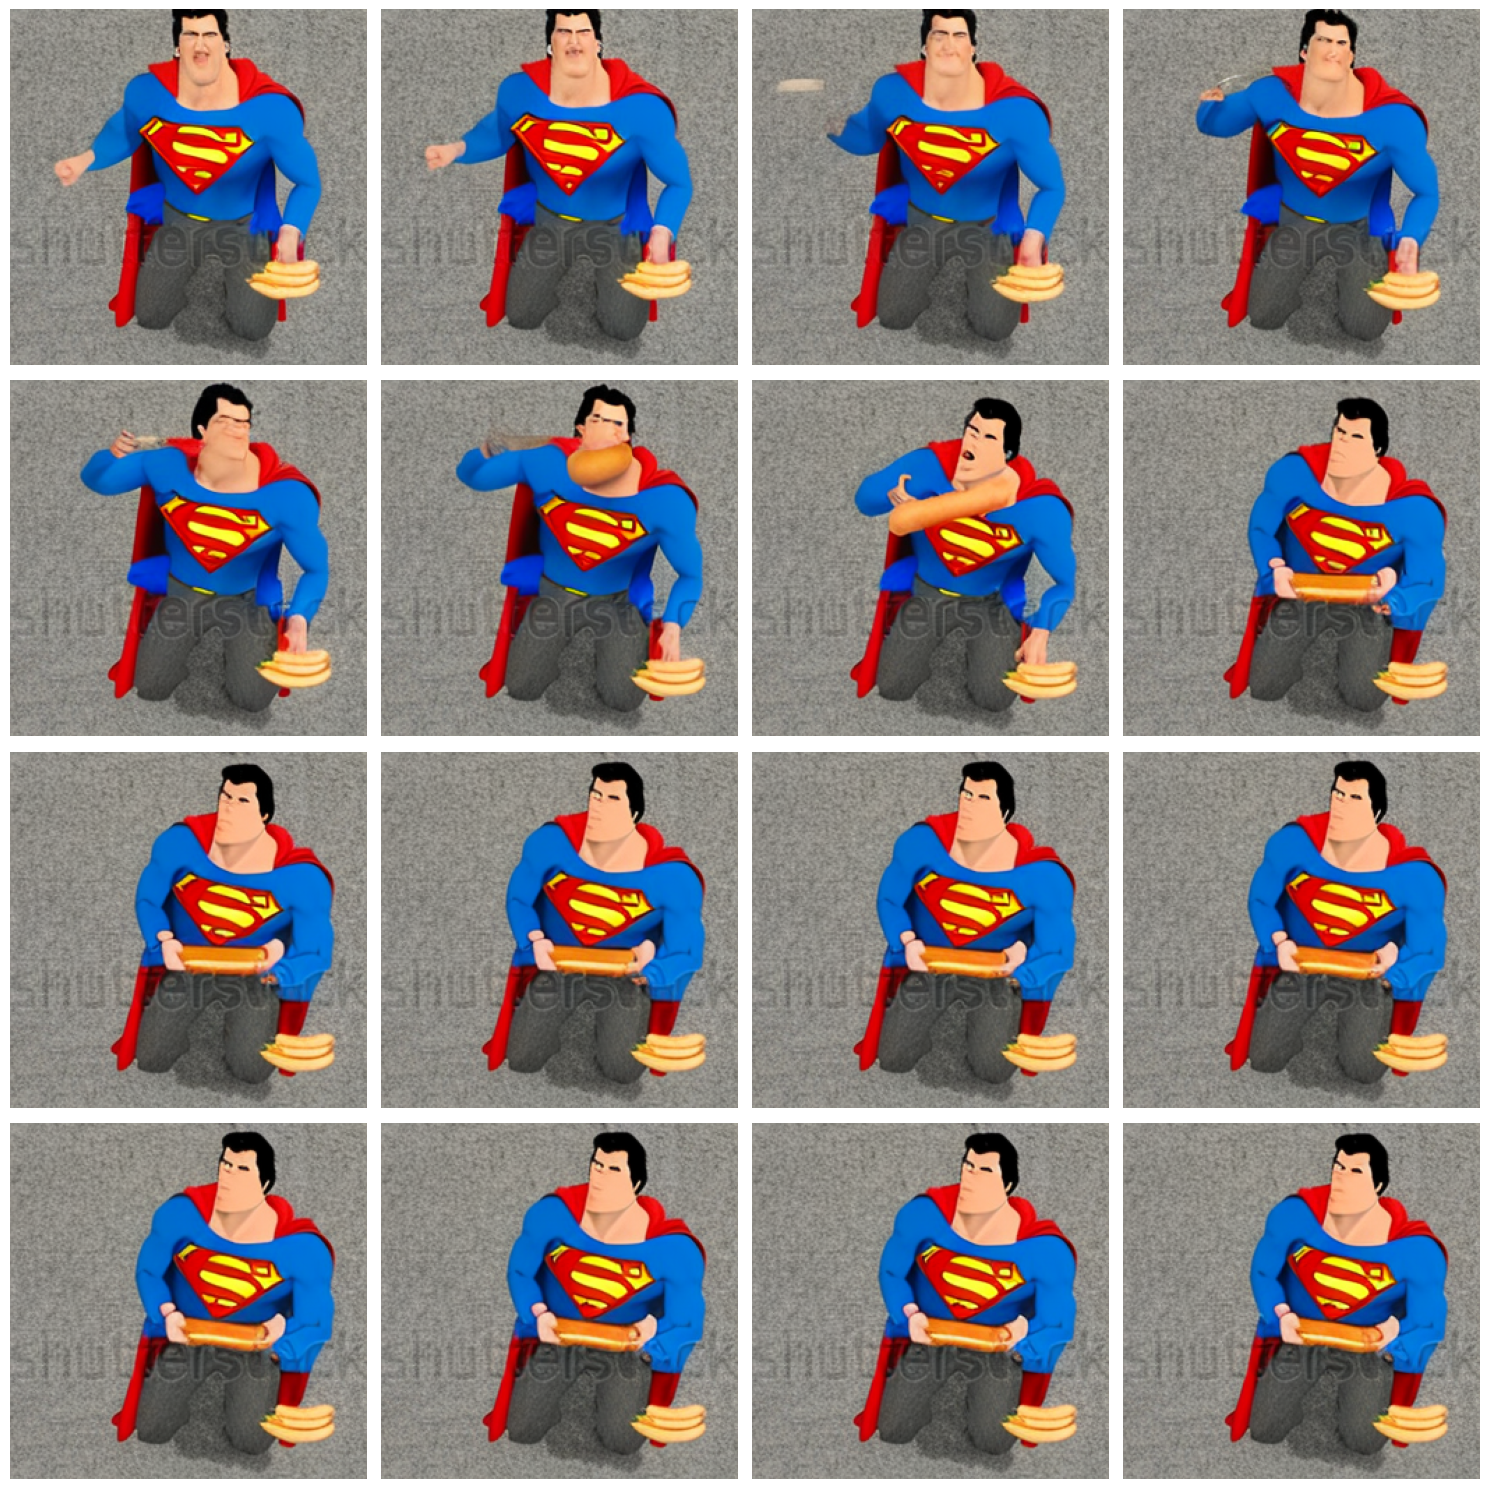

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming vid_frames is your numpy array with shape (1, 16, 256, 256, 3)

# Extract the frames from the first (and only) item in the batch
frames = vid_frames[0]

# Set the dimensions of the grid
grid_size = int(np.ceil(np.sqrt(len(frames))))
fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the array of axes and hide unused if any
axs = axs.flatten()
for ax in axs[len(frames):]:
    ax.axis('off')

# Plot each frame
for i, frame in enumerate(frames):
    axs[i].imshow(frame)
    axs[i].axis('off')  # Hide axis

plt.tight_layout()
plt.show()
